In [1]:
import sys
sys.path.append('../')
import scripts.utils as util
import scripts.eda as eda
import scripts.plot as plot
import pyLDAvis.gensim_models
import scripts.text_analyzer as text_analyzer

In [2]:
data = util.load_data('../data/prepared_data.csv')

In [3]:
util.explore_data(data)

Shape of the data: (1407328, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
Info of the data: None


In [4]:
util.convert_date_dtype(data)
util.drop_unnamed_column(data)

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
util.explore_data(data)

Shape of the data: (1407328, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype                    
---  ------      --------------    -----                    
 0   Unnamed: 0  1407328 non-null  int64                    
 1   headline    1407328 non-null  object                   
 2   url         1407328 non-null  object                   
 3   publisher   1407328 non-null  object                   
 4   date        1407328 non-null  datetime64[ns, UTC-04:00]
 5   stock       1407328 non-null  object                   
dtypes: datetime64[ns, UTC-04:00](1), int64(1), object(4)
memory usage: 64.4+ MB
Info of the data: None


#### Descriptive Statistics

In [6]:
eda.descriptive_statistics(data)

count                     1407328
unique                     845770
top       Benzinga's Top Upgrades
freq                         5449
Name: headline, dtype: object
Average Headline Length:  47
max:  512
min:  3
Headline Length Range:  509


In [7]:
eda.article_per_publisher(data)

publisher
FindTheBest                    1
Paul Dykewicz                  1
White Diamond Research         1
Joseph Trevisani               1
WesternESA                     1
                           ...  
Monica Gerson              82380
Charles Gross              96732
Benzinga Newsdesk         150484
Lisa Levin                186979
Paul Quintaro             228373
Length: 1034, dtype: int64

In [8]:
eda.analyze_publication_trends(data)

/Users/hazel/Desktop/Self Study/KIAM/kiam-week-1/notebooks/../scripts/eda.py:27: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  publications_by_day = data['date'].dt.to_period('D').value_counts().sort_index()
/Users/hazel/Desktop/Self Study/KIAM/kiam-week-1/notebooks/../scripts/eda.py:28: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  publications_by_month = data['date'].dt.to_period('M').value_counts().sort_index()
/Users/hazel/Desktop/Self Study/KIAM/kiam-week-1/notebooks/../scripts/eda.py:29: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  publications_by_year = data['date'].dt.to_period('Y').value_counts().sort_index()


(date
 2009-02-14      1
 2009-04-27      2
 2009-04-29      1
 2009-05-22      1
 2009-05-27      6
              ... 
 2020-06-07     25
 2020-06-08    765
 2020-06-09    804
 2020-06-10    806
 2020-06-11    544
 Freq: D, Name: count, Length: 3955, dtype: int64,
 date
 2009-02        1
 2009-04        3
 2009-05       12
 2009-06       40
 2009-07       75
            ...  
 2020-02    18879
 2020-03    24994
 2020-04    20757
 2020-05    17992
 2020-06     6447
 Freq: M, Name: count, Length: 136, dtype: int64,
 date
 2009     11489
 2010     81319
 2011    131322
 2012    122655
 2013    121523
 2014    134859
 2015    135295
 2016    141892
 2017    124456
 2018    146924
 2019    150380
 2020    105214
 Freq: Y-DEC, Name: count, dtype: int64)

#### Time Series Analysis 

 Publications By Season

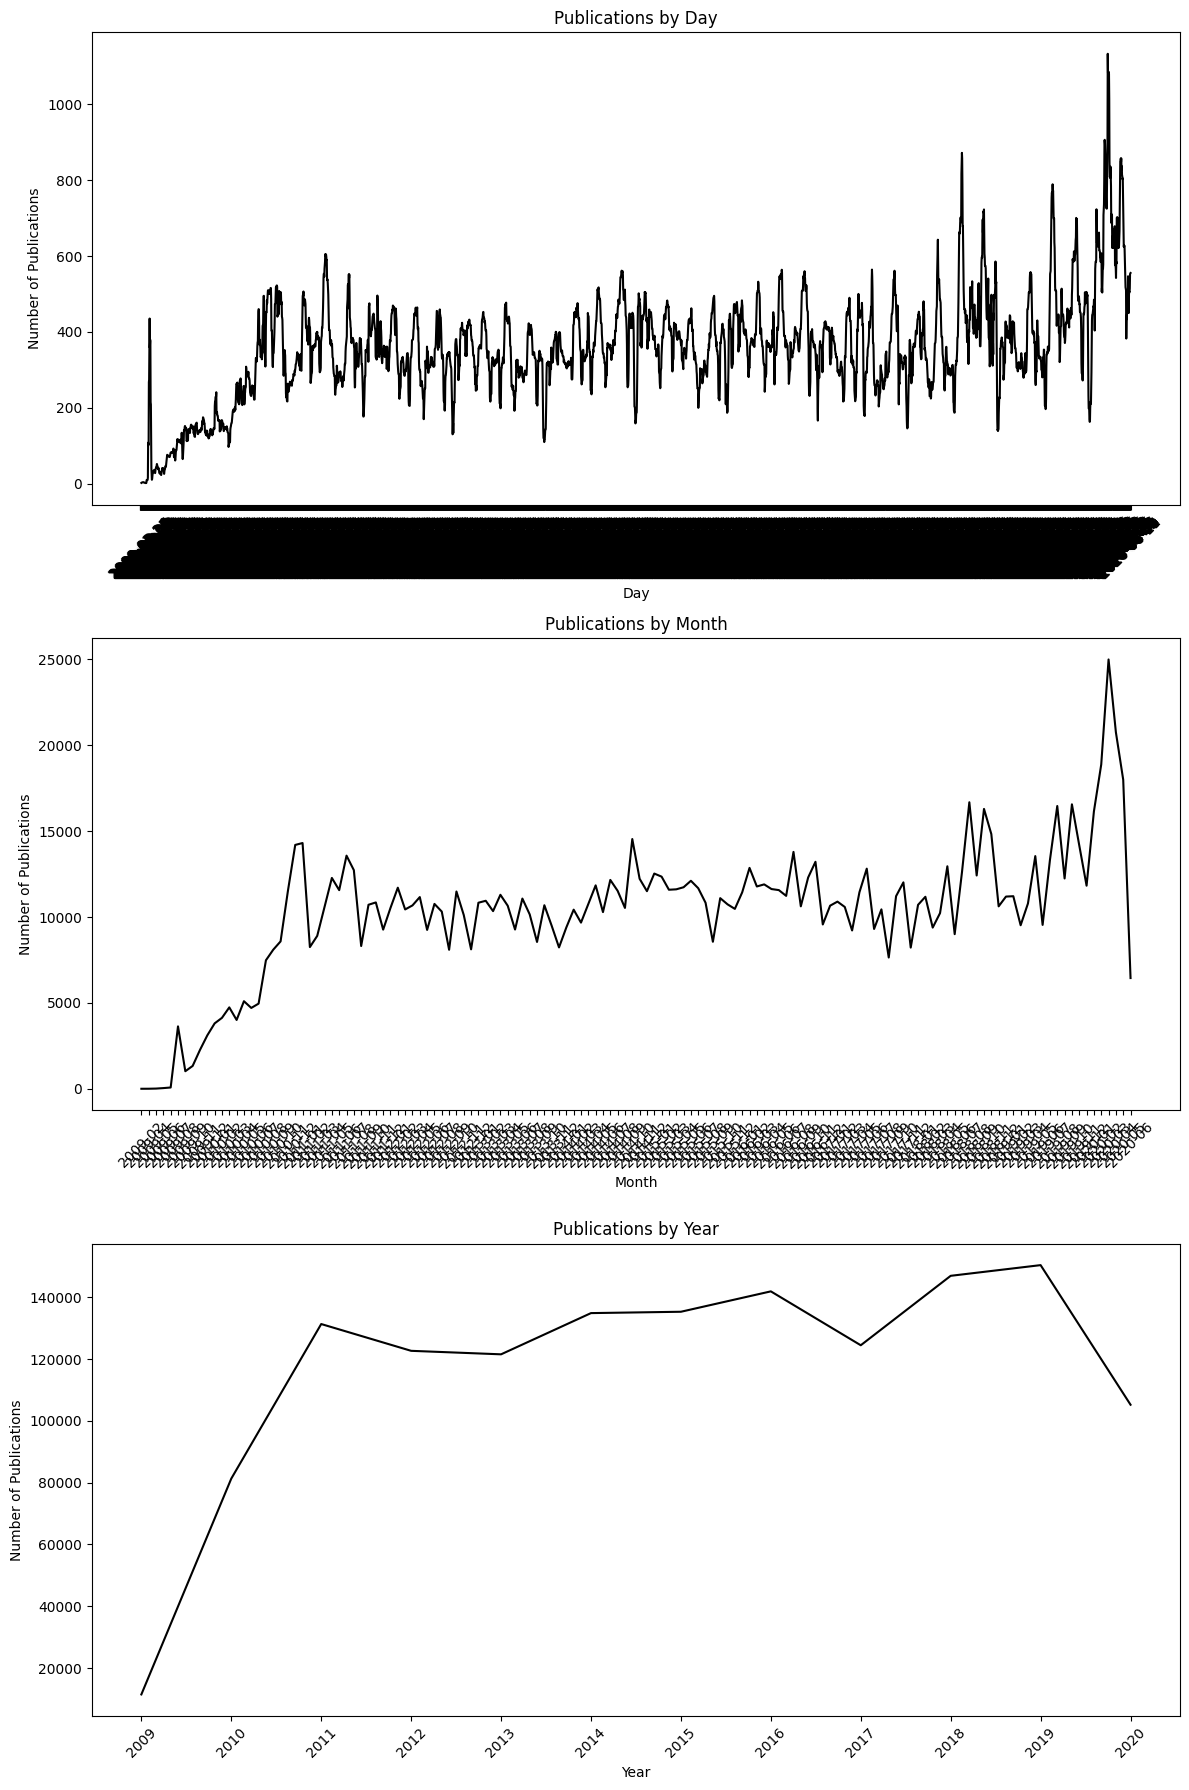

In [9]:
plot.plot_publications_by_period(data)

Publications By Hour

In [10]:
eda.analyze_publishing_time(data)

publication_hour
0     1351408
1          14
2          57
3          93
4        1469
5        1829
6        2476
7        5033
8        5527
9        5965
10       7669
11       5701
12       5732
13       2710
14       2075
15       1612
16       3939
17       2800
18        704
19        227
20        131
21         82
22         48
23         27
dtype: int64


/Users/hazel/Desktop/Self Study/KIAM/kiam-week-1/notebooks/../scripts/plot.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publication_by_hour.index, y= publication_by_hour.values, palette='Blues_d')


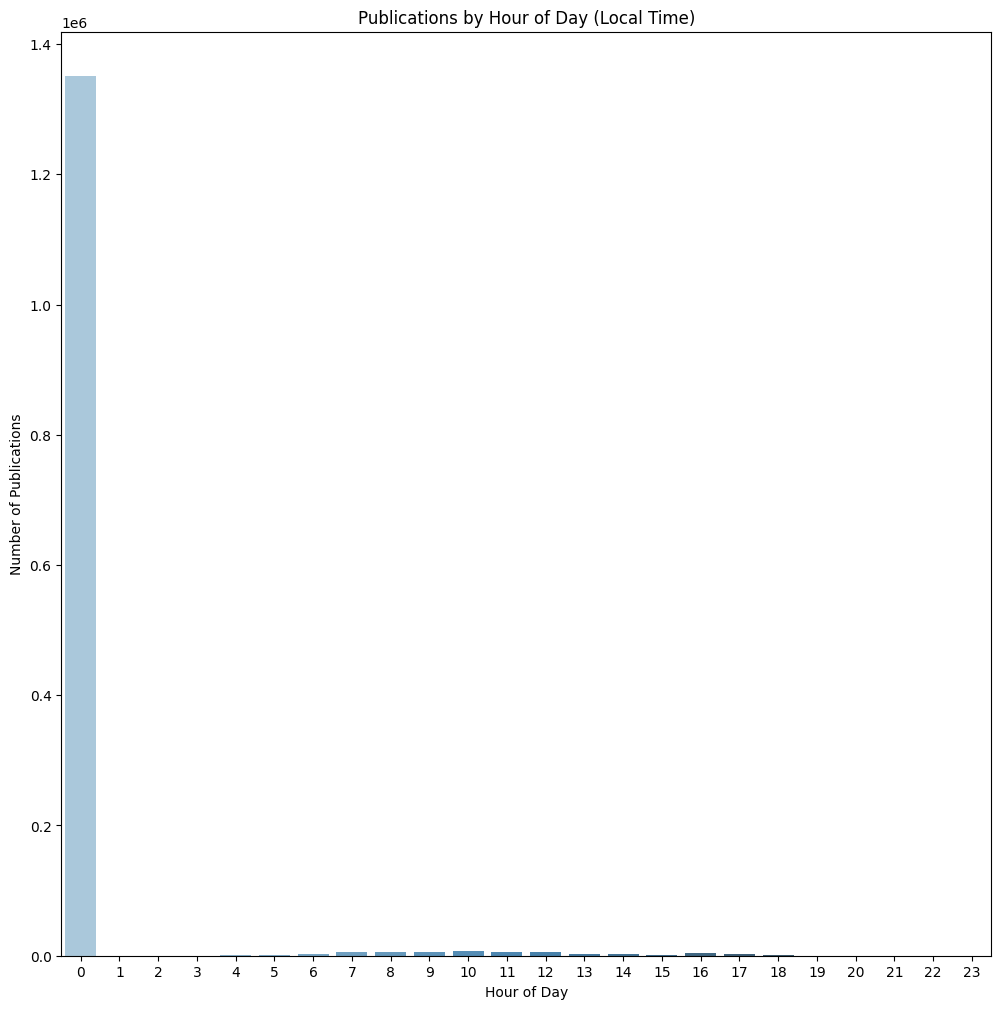

In [11]:
plot.plot_publications_by_hour(data)

#### Text Analysis (Sentiment analysis & Topic Modeling)

In [12]:
data_with_sentiment = text_analyzer.analyze_headline_sentiment(data)

print(data_with_sentiment[['headline', 'sentiment']].head(10))

                                            headline sentiment
0            Stocks That Hit 52-Week Highs On Friday   neutral
1         Stocks That Hit 52-Week Highs On Wednesday   neutral
2                      71 Biggest Movers From Friday   neutral
3       46 Stocks Moving In Friday's Mid-Day Session   neutral
4  B of A Securities Maintains Neutral on Agilent...  positive
5  CFRA Maintains Hold on Agilent Technologies, L...  negative
6  UBS Maintains Neutral on Agilent Technologies,...   neutral
7  Agilent Technologies shares are trading higher...  positive
8  Wells Fargo Maintains Overweight on Agilent Te...  negative
9         10 Biggest Price Target Changes For Friday   neutral


In [13]:
text_analyzer.preprocess_text_spacy(data)
data.head(5)

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,publication_hour,sentiment_score,sentiment,processed_headline
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,10,0.000,neutral,stock hit 52 week high friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,10,0.000,neutral,stock hit 52 week high wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,4,0.000,neutral,71 big mover friday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,12,0.000,neutral,46 stock move friday mid day session
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,11,0.296,positive,b security maintain neutral agilent technology...


In [14]:
text_analyzer.apply_lda(data)

(0, '0.035*"stock" + 0.035*"watch" + 0.033*"xlf" + 0.033*"xle" + 0.027*"utility"')
(1, '0.053*"earning" + 0.038*"xlk" + 0.037*"xrt" + 0.034*"etfs" + 0.034*"vdc"')
(2, '0.048*"sector" + 0.041*"share" + 0.037*"trade" + 0.036*"stock" + 0.032*"price"')
(3, '0.079*"market" + 0.075*"etf" + 0.045*"mid" + 0.039*"day" + 0.039*"update"')
(4, '0.087*"$" + 0.048*"pt" + 0.043*"buy" + 0.036*"target" + 0.035*"price"')
(5, '0.212*"$" + 0.086*"m" + 0.057*"vs" + 0.048*"sale" + 0.044*"est"')
(6, '0.080*"$" + 0.045*"bank" + 0.044*"option" + 0.033*"alert" + 0.025*"0.6"')
(7, '0.110*"benzinga" + 0.062*"retail" + 0.048*"pro" + 0.027*"capital" + 0.026*"downgrade"')
(8, '0.028*"share" + 0.024*"say" + 0.019*"announce" + 0.018*"report" + 0.013*"yum"')
(9, '0.031*"financial" + 0.025*"expect" + 0.022*"lead" + 0.018*"0.7" + 0.016*"tech"')


/Users/hazel/Desktop/Self Study/KIAM/kiam-week-1/.venv/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=45217) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/hazel/Desktop/Self Study/KIAM/kiam-week-1/.venv/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=45217) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/hazel/Desktop/Self Study/KIAM/kiam-week-1/.venv/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=45217) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/hazel/Desktop/Self Study/KIAM/kiam-week-1/.venv/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=45217) is multi-threaded, use of fork() ma

In [ ]:

pyLDAvis.enable_notebook(local=True)
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

pyLDAvis.display(vis)